In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('C:/Users/Christopher Ogbeide/Desktop/data/Ads_CTR_Optimisation.csv')

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

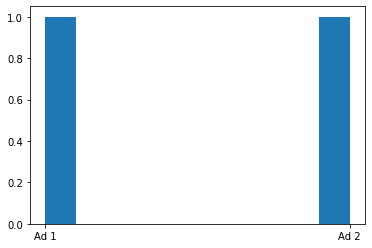

In [29]:
a = dataset.columns[0]
b = dataset.columns[1]

c = [a, b]
plt.hist(c)

(array([[8297.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1703.],
        [8705.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1295.],
        [9272.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          728.],
        [8804.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1196.],
        [7305.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2695.],
        [9874.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          126.],
        [8888.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1112.],
        [7909.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2091.],
        [9048.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          952.],
        [9511.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          489.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 BarContainer objects>)

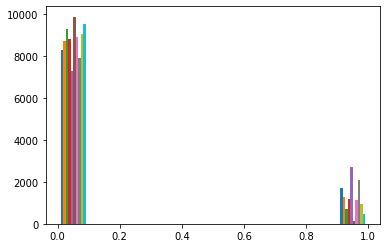

In [14]:
plt.hist(dataset)

In [8]:
dataset.sum()

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64

In [9]:
x = dataset.sum(1)
x.nlargest(n=10)

2663    6
220     5
308     5
420     5
458     5
697     5
968     5
1434    5
1768    5
2397    5
dtype: int64

In [10]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selection = [0] * d
sum_of_reward = [0] * d
total_reward = 0

In [11]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selection[i] > 0):
            average_reward = sum_of_reward[i] / number_of_selection[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)
    number_of_selection[ad] = number_of_selection[ad] + 1
    reward = dataset.values[n, ad]
    sum_of_reward[ad] = sum_of_reward[ad] + reward
    total_reward = total_reward + reward
#plt.hist(ads_selected)

(array([  901.,   454.,   203.,   400., 15129.,   165.,   385.,  1829.,
          319.,   215.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

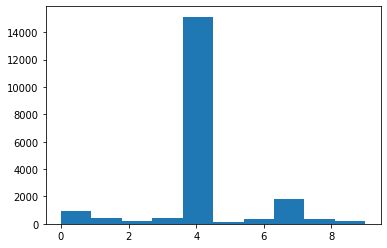

In [12]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(0, d):
        if (number_of_selection[i] > 0):
            max_reward = sum_of_reward[i] / number_of_selection[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selection[i])
            upper_bound = max_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    number_of_selection[ad] = number_of_selection[ad] + 1
    reward = dataset.values[n, ad]
    sum_of_reward[ad] = sum_of_reward[ad] + reward
    total_reward = total_reward + reward
    
plt.hist(ads_selected)